In [25]:
# import all technologies

import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as  sns

In [26]:
#uploaded file
df=pd.read_csv(r'C:\Users\HP\Downloads\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv',encoding='unicode_escape')

In [27]:
#check file loaded or not
df.shape

(11251, 15)

In [28]:
#get all informations of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [29]:
#Remove this Null col. if not needed
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [30]:
#check again the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [31]:
#for checking duplicates values
df.duplicated().sum()

np.int64(8)

In [32]:
#Rename columns
df.rename(columns={'Cust_name':'Customer_name'}, inplace=True)
#show columns
df.columns

Index(['User_ID', 'Customer_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [33]:
#Spaces removes from columns names
df.columns=df.columns.str.strip()
#for cell values 
df=df.applymap(lambda x:x.strip() if isinstance(x,str)else x)

C:\Users\HP\AppData\Local\Temp\ipykernel_12372\209334057.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df=df.applymap(lambda x:x.strip() if isinstance(x,str)else x)


In [34]:
df.isnull().sum()

User_ID              0
Customer_name        0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [35]:
#handel null using median
df['Amount'].fillna(df['Amount'].median(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_12372\1133493924.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(df['Amount'].median(),inplace=True)


In [36]:
#check again
df.isnull().sum()

User_ID             0
Customer_name       0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [37]:
# summary statistics of your numerical data
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9452.176734
std,1.716125e+03,12.754122,0.493632,1.115047,5219.754408
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [38]:
#new column for calculate total spend on shopping
df['Total_spending']=df['Orders']*df['Amount']

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Customer_name     11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11251 non-null  float64
 13  Total_spending    11251 non-null  float64
dtypes: float64(2), int64(4), object(8)
memory usage: 1.2+ MB


In [40]:
#lambda function for single line code
#who spend more than 15000
df['High_Spender']=df['Amount'].apply(lambda x:'Yes' if x >=15000 else 'No')
#check result
df[['Amount','High_Spender']].head()


,Amount,High_Spender
0,23952.0,Yes
1,23934.0,Yes
2,23924.0,Yes
3,23912.0,Yes
4,23877.0,Yes


In [41]:
#Level Spender Segmentation 
def Spender_Category(x):
    if x<5000:
        return 'Low'
    elif 5000<=x<=15000:
        return 'Medium'
    else:
        return  'High'
    #create new column for level segmentation
df['Spender_Category']=df['Amount'].apply(Spender_Category)  
df[['Amount','Spender_Category']].head(10)  


,Amount,Spender_Category
0,23952.00,High
1,23934.00,High
2,23924.00,High
3,23912.00,High
4,23877.00,High
5,23877.00,High
6,23841.00,High
7,8109.00,Medium
8,23809.00,High
9,23799.99,High


Text(0.5, 1.0, 'Customer Segentation (Low/Medium/High spender)')

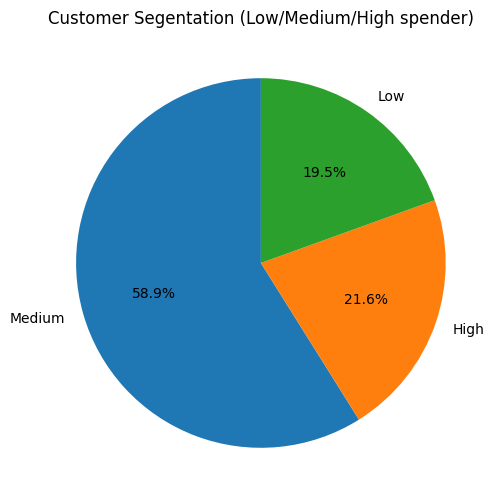

In [48]:
#EDA(Exploratory Data Analysis)
#1.which group of customers should we target more in Diwali sales?
#Spender category distribution
import  matplotlib.pyplot as plt
category_counts=df['Spender_Category'].value_counts()
#Pie chart
plt.figure(figsize=(6,6))
plt.pie(category_counts,labels=category_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Customer Segentation (Low/Medium/High spender)')